Parte 1:
Leitura do csv 'healthcare-datset-stroke-data'

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
avc = pd.read_csv('../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
avc

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Parte 2:
Analisando o dataset

In [3]:
avc = avc.drop('id', axis=1)

In [4]:
print(avc.info())
print()
print('Quantidade de avcs:')
print(avc.stroke.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB
None

Quantidade de avcs:
0    4861
1     249
Name: stroke, dtype: int64


Total de dados 'bmi': 4909


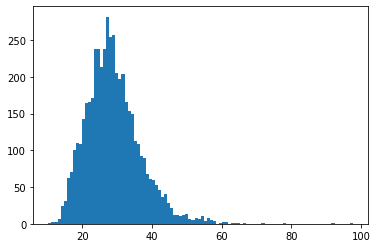

In [5]:
plt.hist(avc.bmi, bins=100)
print('Total de dados \'bmi\':', avc.bmi.count())


In [6]:
# sobrepeso e obesidade sao fatores de risco para desenvolvimento de avc (antigo.saude.gov.br)
cont = 0
cont1 = 0
cont2 = 0
cont3 = 0
for i in range(len(avc.stroke)):
    if avc.bmi[i] > 25:
        cont += 1 
    if avc.bmi[i] > 25 and avc.stroke[i] == 1:
        cont1 += 1 
    if avc.bmi[i] > 25 and avc.avg_glucose_level[i] > 100 and avc.stroke[i] == 1:
        cont2 += 1 
    if avc.bmi[i] > 25 and avc.hypertension[i] == 1 and avc.stroke[i] == 1:
        cont3 += 1
print('Total de pesooas com sobrepeso:',cont)
print('Sofreram avc e tinham sobrepeso: {:.2f}%'.format(cont1/249 * 100))  # 68%   
print('Tinha nivel de glicose alto, sobrepeso e sofreram avc: {:.2f}%'.format(cont2/249 * 100))  # 41%  
print('Tinha hipertensao, sobrepeso e sofreram avc: {:.2f}%'.format(cont3/249 * 100))  # 20% 
# 40 pessoas sem dados 'bmi' sofreram avc ( calculado antes )
print('Caso os 40 dados sem \'bmi\' que sofreram avc estejam com sobrepeso: {:.2f}%'.format((cont1 + 40) / 249 * 100)) # prevendo que os casos sem 'bmi' que sofreram avc também estejam com sobrepeso 

Total de pesooas com sobrepeso: 3302
Sofreram avc e tinham sobrepeso: 68.67%
Tinha nivel de glicose alto, sobrepeso e sofreram avc: 40.96%
Tinha hipertensao, sobrepeso e sofreram avc: 20.08%
Caso os 40 dados sem 'bmi' que sofreram avc estejam com sobrepeso: 84.74%


Total de dados : 5110


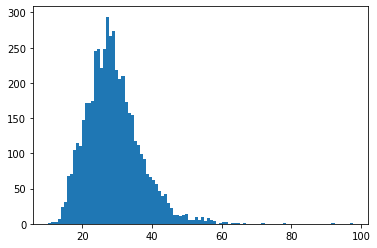

In [7]:
avc['bmi'] = avc['bmi'].fillna(method = 'pad')
plt.hist(avc.bmi, bins=100)
print('Total de dados :', avc.bmi.count())

In [8]:
cont = 0
cont1 = 0
cont2 = 0
cont3 = 0
for i in range(len(avc.stroke)):
    if avc.bmi[i] > 25:
        cont += 1 
    if avc.bmi[i] > 25 and avc.stroke[i] == 1:
        cont1 += 1 
    if avc.bmi[i] > 25 and avc.avg_glucose_level[i] > 100 and avc.stroke[i] == 1:
        cont2 += 1 
    if avc.bmi[i] > 25 and avc.hypertension[i] == 1 and avc.stroke[i] == 1:
        cont3 += 1

print('Total de pesooas com sobrepeso:',cont)
print('Sofreram avc e tinham sobrepeso: {:.2f}%'.format(cont1/249 * 100))  # 82% (diferença de apenas 2% da previsao)   
print('Tinha nivel de glicose alto, sobrepeso e sofreram avc: {:.2f}%'.format(cont2/249 * 100))  # 48%  
print('Tinha hipertensao, sobrepeso e sofreram avc: {:.2f}%'.format(cont3/249 * 100))  # 22% 

Total de pesooas com sobrepeso: 3449
Sofreram avc e tinham sobrepeso: 82.33%
Tinha nivel de glicose alto, sobrepeso e sofreram avc: 48.59%
Tinha hipertensao, sobrepeso e sofreram avc: 22.49%


In [9]:
print('Work type:')
print(avc.work_type.value_counts())
print()
print('Gender:')
print(avc.gender.value_counts()) # OUTRO ?????????
print()
print('Ever Married:')
print(avc.ever_married.value_counts())   
print()
print('Residence_type')
print(avc.Residence_type.value_counts())

Work type:
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

Gender:
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Ever Married:
Yes    3353
No     1757
Name: ever_married, dtype: int64

Residence_type
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


In [10]:
avc['gender'] = avc['gender'].map({'Male':0, 'Female':1 })
avc['ever_married'] = avc['ever_married'].map({'No':0, 'Yes':1})
avc['Residence_type'] = avc['Residence_type'].map({'Urban':0, 'Rural':1})
avc['work_type'] = avc['work_type'].map({'Private':0, 'Self-employed':1, 'children':2, 'Govt_job':3, 'Never_worked':4})
avc

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.0,67.0,0,1,1,0,0,228.69,36.6,formerly smoked,1
1,1.0,61.0,0,0,1,1,1,202.21,36.6,never smoked,1
2,0.0,80.0,0,1,1,0,1,105.92,32.5,never smoked,1
3,1.0,49.0,0,0,1,0,0,171.23,34.4,smokes,1
4,1.0,79.0,1,0,1,1,1,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1.0,80.0,1,0,1,0,0,83.75,18.6,never smoked,0
5106,1.0,81.0,0,0,1,1,0,125.20,40.0,never smoked,0
5107,1.0,35.0,0,0,1,1,1,82.99,30.6,never smoked,0
5108,0.0,51.0,0,0,1,0,1,166.29,25.6,formerly smoked,0


In [11]:
print(avc.smoking_status.value_counts())

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


In [12]:
avc['smoking_status'] = avc['smoking_status'].map({'never smoked':0, 'Unknown':1, 'formerly smoked':2, 'smokes':3 })


In [13]:
cont = 0 
cont1 = 0
cont2 = 0
for i in range(len(avc.stroke)):
    if avc.age[i] <= 15:
        cont += 1
    if avc.age[i] <= 15 and avc.stroke[i] == 1:
        cont1 += 1
        x = avc.age[i]
    if (avc.smoking_status[i] == 2 or avc.smoking_status[i] == 3 ) and avc.age[i] <= 15:
        cont2 += 1
print('Quantidade total de pessoas com 15 anos ou menos:', cont)
print('Quantidade de pessoas com 15 anos ou menos que sofreram avc:', cont1)
print('Pessoas com 15 anos ou menos que fumam ou ja fumaram:{:.2f}%'.format(cont2/cont * 100)) # 3%
# apenas duas pessoas com 15 anos ou menos sofreu avc e elas não fumava

Quantidade total de pessoas com 15 anos ou menos: 744
Quantidade de pessoas com 15 anos ou menos que sofreram avc: 2
Pessoas com 15 anos ou menos que fumam ou ja fumaram:2.96%


In [14]:
# todos as pessoas com 15 anos ou menos foram consideradas não fumantes
for i in range(len(avc.stroke)):
    if avc.smoking_status[i] == 1 and avc.age[i] <= 15 :
        avc.smoking_status[i] = 0


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [15]:
avc.smoking_status.value_counts()

0    2527
1     909
2     885
3     789
Name: smoking_status, dtype: int64

In [16]:
cont = 0
cont1 = 0 
cont2 = 0 
for i in range(len(avc.stroke)):
    if avc.smoking_status[i] == 1 and avc.stroke[i] == 1:
        cont += 1
    if (avc.smoking_status[i] == 2 or avc.smoking_status[i] == 3) and avc.stroke[i] == 1:
        cont1 += 1
    if (avc.smoking_status[i] == 2 or avc.smoking_status[i] == 3) and avc.stroke[i] == 1 and ( avc.avg_glucose_level[i] > 100 or avc.hypertension[i] == 1 or avc.heart_disease[i] == 1 ):
        cont2 += 1
        
print('Quantidade de pessoas com status de fumante desconhecido que sofreram avc:', cont)
print('Pessoas que sofreram avc e ja fumaram ou fumam: {:.2f}%'.format(cont1/249 * 100)) # 45%
print('{:.2f}% tinham hipertensao ou alto indice de glicose ou doença cardiaca'.format(cont2/cont1 * 100)) # 76%
print('Das pessoas que tiveram avc e fumavam {:.2f}% NAO tinham hipertensao, alto indice de glicose ou doença cardiaca'.format((cont1 - cont2) /249 * 100)) # 10%

Quantidade de pessoas com status de fumante desconhecido que sofreram avc: 45
Pessoas que sofreram avc e ja fumaram ou fumam: 44.98%
76.79% tinham hipertensao ou alto indice de glicose ou doença cardiaca
Das pessoas que tiveram avc e fumavam 10.44% NAO tinham hipertensao, alto indice de glicose ou doença cardiaca


In [17]:
for i in range(len(avc.stroke)):
    if avc.smoking_status[i] == 1 :
        avc.smoking_status[i] = None


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
avc.smoking_status.replace(np.nan, method = 'pad', inplace=True)
avc.smoking_status.value_counts()

0.0    3067
2.0    1087
3.0     956
Name: smoking_status, dtype: int64

In [19]:
cont1 = 0 
cont2 = 0 
for i in range(len(avc.stroke)):
    if (avc.smoking_status[i] == 2 or avc.smoking_status[i] == 3) and avc.stroke[i] == 1:
        cont1 += 1
    if (avc.smoking_status[i] == 2 or avc.smoking_status[i] == 3) and avc.stroke[i] == 1 and ( avc.avg_glucose_level[i] > 100 or avc.hypertension[i] == 1 or avc.heart_disease[i] == 1 ):
        cont2 += 1
        
        
print('Pessoas que sofreram avc e ja fumaram ou fumam: {:.2f}'.format(cont1/249 * 100)) # 55%
print('{:.2f} tinham hipertensao ou alto indice de glicose ou doença cardiaca'.format(cont2/cont1 * 100)) # 73%
print('Das pessoas que tiveram avc e fumavam {:.2f} NAO tinham hipertensao, alto indice de glicose ou doença cardiaca'.format((cont1 - cont2) /249 * 100)) # 15%


Pessoas que sofreram avc e ja fumaram ou fumam: 55.82
73.38 tinham hipertensao ou alto indice de glicose ou doença cardiaca
Das pessoas que tiveram avc e fumavam 14.86 NAO tinham hipertensao, alto indice de glicose ou doença cardiaca


In [20]:
cont = 0 
cont1 = 0
print('Quantidade de dados \'gender\':', avc.gender.count())
for i in range(len(avc.stroke)):
    if avc.gender[i] == 0 and avc.stroke[i] == 1: # male 
        cont += 1
    if avc.gender[i] == 1 and avc.stroke[i] == 1: # female 
        cont1 += 1 
print('quantidade de homens que sofreram avc:', cont)
print('quantidade de mulheres que sofreram avc:', cont1)

Quantidade de dados 'gender': 5109
quantidade de homens que sofreram avc: 108
quantidade de mulheres que sofreram avc: 141


In [21]:
cont = 0 
for i in range(len(avc.stroke)):
    if avc.gender[i] != 0 and avc.gender[i] != 1:
        print(avc.loc[i]) # nao sofreu avc
        avc.gender[i] = '0' 


gender                  NaN
age                   26.00
hypertension           0.00
heart_disease          0.00
ever_married           0.00
work_type              0.00
Residence_type         1.00
avg_glucose_level    143.33
bmi                   22.40
smoking_status         2.00
stroke                 0.00
Name: 3116, dtype: float64


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [22]:
avc.gender.count()

5110

Parte 3: Aplicando OverSampling

In [23]:


x = avc.drop(['stroke'],axis=1)
y = avc['stroke']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)


smote = SMOTE()

x_smote, y_smote = smote.fit_resample(x_train,y_train)
print('Total de strokes do y de treino antes do oversampling de dados: {}'.format(sum(y_train==1)))
print('Total de nao strokes do y de treino antes do oversampling de dados: {} \n'.format(sum(y_train==0)))

print('Shape do x de treino apos o oversampling: {}'.format(x_smote.shape))
print('Shape do y de treino apos o oversampling: {}'.format(y_smote.shape))

print('Total de strokes do y de treino depois do oversampling: {}'.format(sum(y_smote == 1)))
print('Total de nao strokes do y de treino depois do oversampling: {}'.format(sum(y_smote == 0)))

Total de strokes do y de treino antes do oversampling de dados: 173
Total de nao strokes do y de treino antes do oversampling de dados: 3404 

Shape do x de treino apos o oversampling: (6808, 10)
Shape do y de treino apos o oversampling: (6808,)
Total de strokes do y de treino depois do oversampling: 3404
Total de nao strokes do y de treino depois do oversampling: 3404


Parte 4: Aplicando o modelo LogistRegression (antes e depois do oversampling )


In [24]:
model = LogisticRegression()
model.fit(x_train, y_train)

result = model.predict(x_test)

print('Accuracy Score:', accuracy_score(result,y_test))
print('\nConfusion Matrix:')
print(confusion_matrix(result,y_test))
print('\nPrecision:')
print(classification_report(result,y_test))

Accuracy Score: 0.9504240052185258

Confusion Matrix:
[[1456   75]
 [   1    1]]

Precision:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1531
           1       0.01      0.50      0.03         2

    accuracy                           0.95      1533
   macro avg       0.51      0.73      0.50      1533
weighted avg       1.00      0.95      0.97      1533



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [25]:
model.fit(x_smote, y_smote)

result = model.predict(x_test)
print('Accuracy Score:', accuracy_score(result,y_test))
print('\nConfusion Matrix:')
print(confusion_matrix(result,y_test))
print('\nPrecision:')
print(classification_report(result,y_test))

Accuracy Score: 0.7899543378995434

Confusion Matrix:
[[1173   38]
 [ 284   38]]

Precision:
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      1211
           1       0.50      0.12      0.19       322

    accuracy                           0.79      1533
   macro avg       0.65      0.54      0.54      1533
weighted avg       0.74      0.79      0.73      1533



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
